In [ ]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#importing libraries
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model, save_model

import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
!kaggle datasets download -d vishnuoum/medicinal-plant-dataset-augmented

Dataset URL: https://www.kaggle.com/datasets/vishnuoum/medicinal-plant-dataset-augmented
License(s): unknown
100% 1.31G/1.31G [01:08<00:00, 23.9MB/s]
100% 1.31G/1.31G [01:08<00:00, 20.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/medicinal-plant-dataset-augmented.zip")
zip_ref.extractall('/content')
zip_ref.close()



In [ ]:
#path of data set
directory = "/content/data"

In [ ]:
# prompt: how to get shape of image in dataset

from tensorflow.keras.preprocessing import image
img = image.load_img(f'/content/data/Arive-Dantu/__0_1104004.png', target_size=(224, 224))
x = image.img_to_array(img)
print(x.shape)


(224, 224, 3)


In [ ]:
batch_size = 64
IMG_SIZE = (224, 224, 3)

In [ ]:
#creating train data set
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG_SIZE[0], IMG_SIZE[1]),
    batch_size=batch_size,
    shuffle=True,
    )

Found 14380 files belonging to 30 classes.
Using 11504 files for training.


In [ ]:
#creating train validation set
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG_SIZE[0], IMG_SIZE[1]),
    batch_size=batch_size,
    shuffle=True
    )

Found 14380 files belonging to 30 classes.
Using 2876 files for validation.


SAMPLE OF TRAINING DATA


In [ ]:
class_names = train_ds.class_names

In [ ]:
np.save(r"F:\\Users\\kkpar\\Documents.npy", class_names)

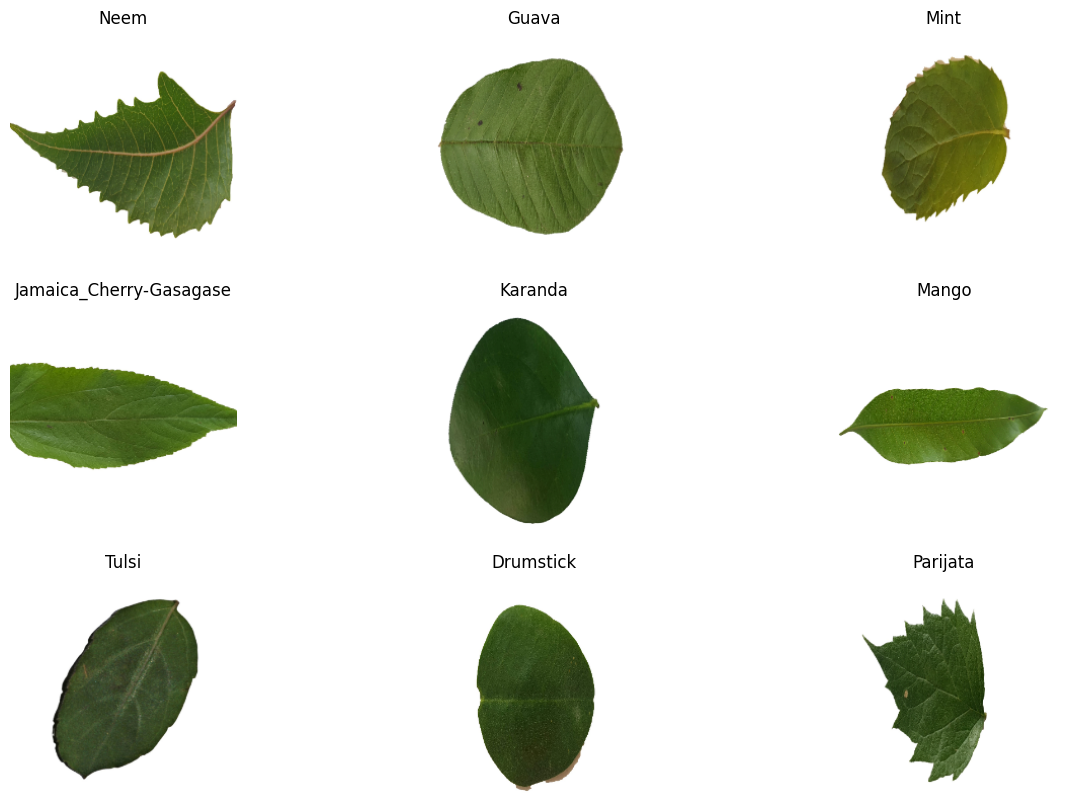

In [ ]:
plt.figure(figsize=(15, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # Find the index of the maximum value in the one-hot encoded label
        predicted_label_index = np.argmax(labels[i])
        plt.title(class_names[predicted_label_index]) # Use the index to get the class name
        plt.axis("off")

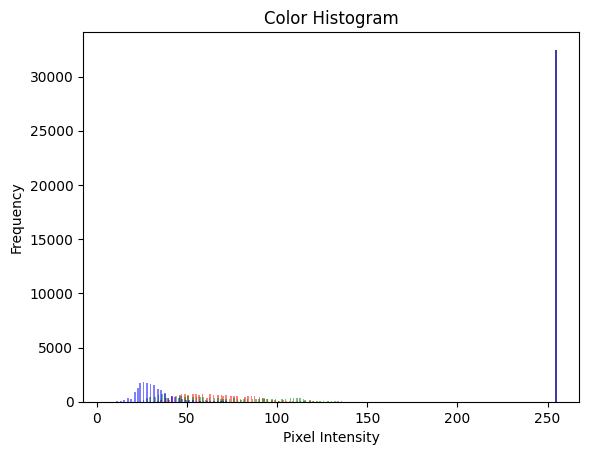

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is our PIL Image object
img = np.array(img) # Convert the PIL Image to a NumPy array

# Separate color channels
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]

# Plot histograms for each channel
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.5)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.5)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.5)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Color Histogram")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Classification head
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(30, activation='softmax'))

# Compiling the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 77s 315ms/step - accuracy: 0.0819 - loss: 3.2816 - val_accuracy: 0.2757 - val_loss: 2.3817
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.3483 - loss: 2.2065 - val_accuracy: 0.5177 - val_loss: 1.6792
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.5732 - loss: 1.4207 - val_accuracy: 0.6384 - val_loss: 1.1958
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.7150 - loss: 0.9452 - val_accuracy: 0.8185 - val_loss: 0.5759
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.8451 - loss: 0.5005 - val_accuracy: 0.8338 - val_loss: 0.4964
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.9192 - loss: 0.2495 - val_accuracy: 0.9284 - val_loss: 0.2273
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.9519 - loss: 0.1516 - val_accuracy: 0.9284 - val_loss: 0.2304
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.9811 - loss: 0

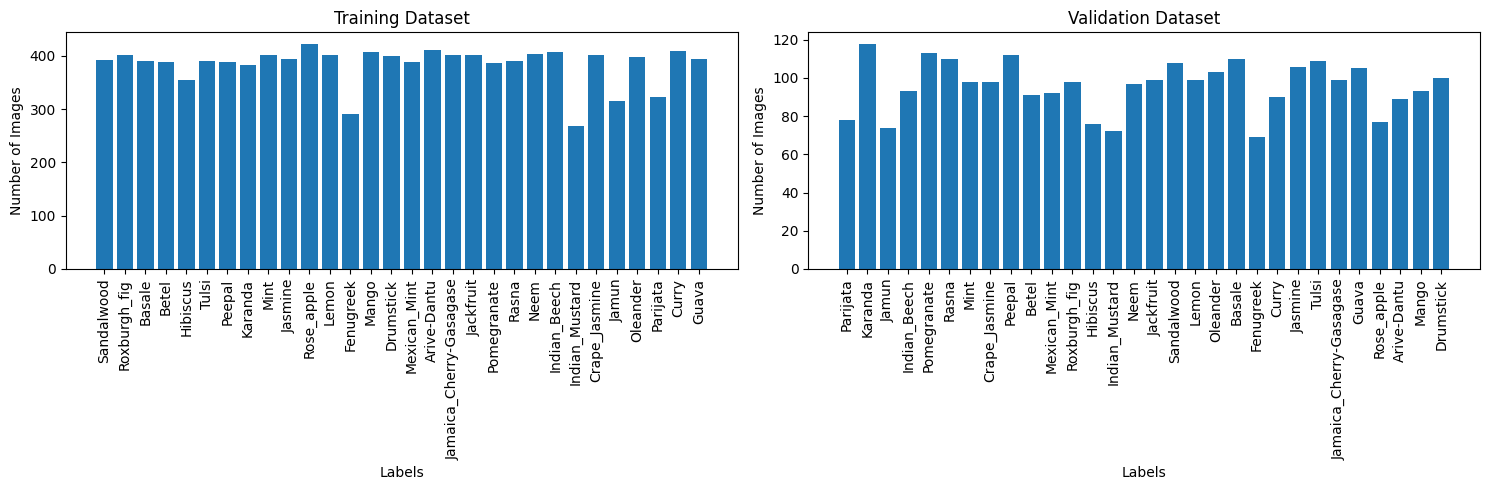

In [ ]:


import matplotlib.pyplot as plt

# Get the number of images for each label in the training dataset
train_label_counts = {}
for images, labels in train_ds:
  for i in range(len(labels)):
    label_index = np.argmax(labels[i].numpy())
    label_name = class_names[label_index]
    if label_name not in train_label_counts:
      train_label_counts[label_name] = 0
    train_label_counts[label_name] += 1

# Get the number of images for each label in the validation dataset
validation_label_counts = {}
for images, labels in validation_ds:
  for i in range(len(labels)):
    label_index = np.argmax(labels[i].numpy())
    label_name = class_names[label_index]
    if label_name not in validation_label_counts:
      validation_label_counts[label_name] = 0
    validation_label_counts[label_name] += 1

# Plot the counts
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(train_label_counts.keys(), train_label_counts.values())
plt.title('Training Dataset')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(validation_label_counts.keys(), validation_label_counts.values())
plt.title('Validation Dataset')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,383,456 (512.63 MB)

 Trainable params: 134,383,454 (512.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

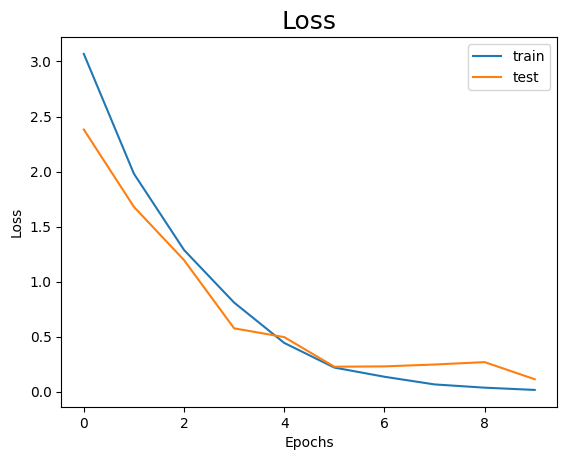

In [ ]:
plt.title("Loss", fontdict={'fontsize':18})
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

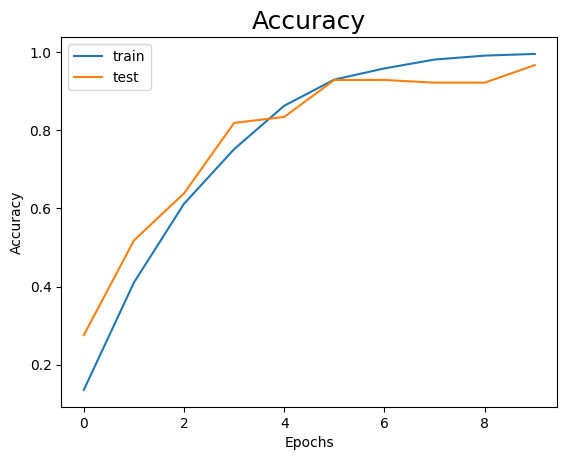

In [ ]:
plt.title("Accuracy", fontdict={'fontsize':18})
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()